In [23]:
import sys
import pandas as pd
import pandas.testing as tm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(data_link,header=None,names=['sepal_length','sepal_width','petal_length','petal_width','class'])


In [7]:
train,test = train_test_split(data,test_size=0.2,random_state=7)

In [9]:
train.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width            class
149           5.9          3.0           5.1          1.8   Iris-virginica
84            5.4          3.0           4.5          1.5  Iris-versicolor
40            5.0          3.5           1.3          0.3      Iris-setosa
66            5.6          3.0           4.5          1.5  Iris-versicolor
106           4.9          2.5           4.5          1.7   Iris-virginica
41            4.5          2.3           1.3          0.3      Iris-setosa
52            6.9          3.1           4.9          1.5  Iris-versicolor
94            5.6          2.7           4.2          1.3  Iris-versicolor
11            4.8          3.4           1.6          0.2      Iris-setosa
51            6.4          3.2           4.5          1.5  Iris-versicolor
77            6.7          3.0           5.0          1.7  Iris-versicolor
85            6.0          3.4           4.5          1.6  Iris-ve

In [10]:
test.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width            class
149           5.9          3.0           5.1          1.8   Iris-virginica
84            5.4          3.0           4.5          1.5  Iris-versicolor
40            5.0          3.5           1.3          0.3      Iris-setosa
66            5.6          3.0           4.5          1.5  Iris-versicolor
106           4.9          2.5           4.5          1.7   Iris-virginica
41            4.5          2.3           1.3          0.3      Iris-setosa
52            6.9          3.1           4.9          1.5  Iris-versicolor
94            5.6          2.7           4.2          1.3  Iris-versicolor
11            4.8          3.4           1.6          0.2      Iris-setosa
51            6.4          3.2           4.5          1.5  Iris-versicolor
77            6.7          3.0           5.0          1.7  Iris-versicolor
85            6.0          3.4           4.5          1.6  Iris-ve

In [11]:
train.shape

(120, 5)

In [12]:
test.shape

(30, 5)

In [13]:
train.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width            class
126           6.2          2.8           4.8          1.8   Iris-virginica
79            5.7          2.6           3.5          1.0  Iris-versicolor
22            4.6          3.6           1.0          0.2      Iris-setosa
139           6.9          3.1           5.4          2.1   Iris-virginica
74            6.4          2.9           4.3          1.3  Iris-versicolor
..            ...          ...           ...          ...              ...
142           5.8          2.7           5.1          1.9   Iris-virginica
92            5.8          2.6           4.0          1.2  Iris-versicolor
103           6.3          2.9           5.6          1.8   Iris-virginica
67            5.8          2.7           4.1          1.0  Iris-versicolor
25            5.0          3.0           1.6          0.2      Iris-setosa

[120 rows x 5 columns]>

In [14]:
pd.value_counts(train['class'])

Iris-setosa        43
Iris-virginica     39
Iris-versicolor    38
Name: class, dtype: int64

Univariate analysis -  Sepal_length


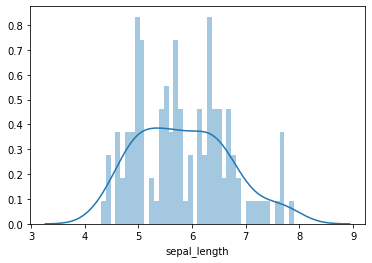

In [17]:
print("Univariate analysis -  Sepal_length")
sns.distplot(train['sepal_length'],kde=True,bins=40)
plt.show()

univariate analysis - sepal_width


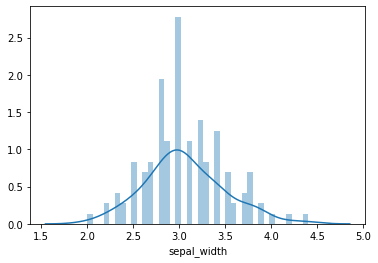

In [18]:
print("univariate analysis - sepal_width")
sns.distplot(train['sepal_width'],kde=True,bins=40)
plt.show()


univariate analysis -petal_length 


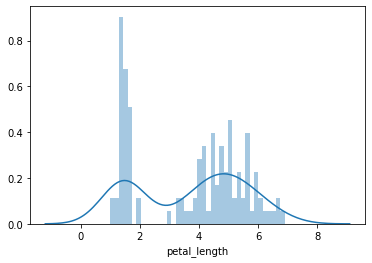

In [19]:
print("univariate analysis -petal_length ")
sns.distplot(train['petal_length'],kde=True,bins=40)
plt.show()

univariate analysis - petal_width


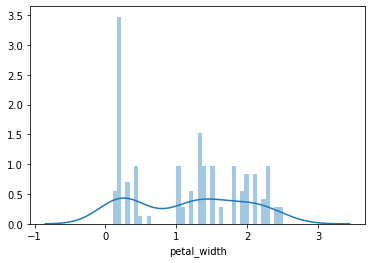

In [20]:
print("univariate analysis - petal_width")
sns.distplot(train['petal_width'],kde=True,bins=40)
plt.show()

In [24]:
#model
train['class'][train['class']=='Iris-versicolor']=0
train['class'][train['class']=='Iris-setosa']=1
train['class'][train['class']=='Iris-virginica']=2
test['class'][test['class']=='Iris-versicolor']=0
test['class'][test['class']=='Iris-setosa']=1
test['class'][test['class']=='Iris-virginica']=2
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
y = pd.to_numeric(y)
y_test=pd.to_numeric(test.iloc[:,-1])




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports

In [26]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
scoring = 'accuracy'

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.983333 (0.033333)
DT: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [29]:
print(" Making predictions using KNN")
KNN = KNeighborsClassifier()
KNN.fit(X,y)
predictions = KNN.predict(test.iloc[:,:-1])
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

 Making predictions using KNN
0.9
[[11  0  1]
 [ 0  7  0]
 [ 2  0  9]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       1.00      1.00      1.00         7
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

